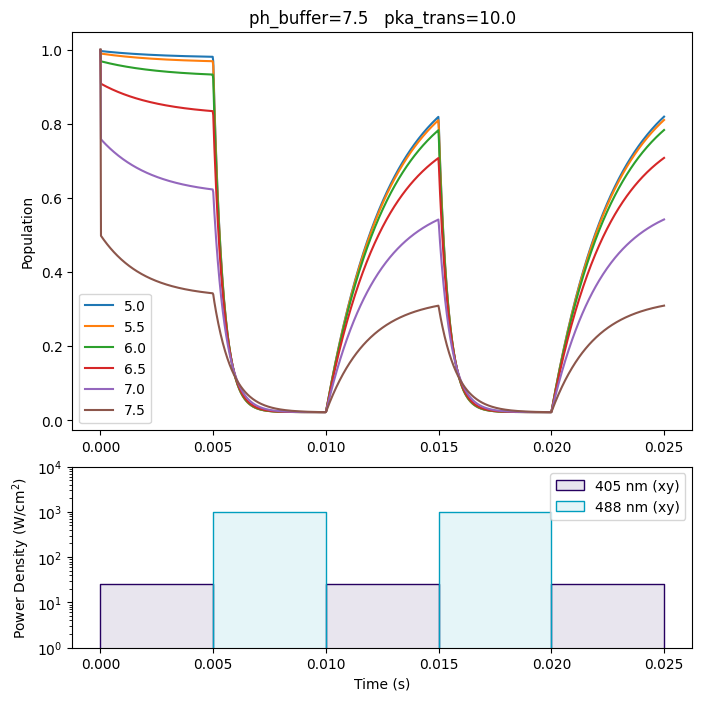

In [4]:
import numpy as np
from rotational_diffusion_photophysics.models.illumination import ModulatedLasers
from rotational_diffusion_photophysics.models.fluorophore import rsEGFP2_8states
from rotational_diffusion_photophysics.models.fluorophore import rsEGFP2_8states_pka
from rotational_diffusion_photophysics.models.detection import PolarizedDetection
from rotational_diffusion_photophysics.models.diffusion import IsotropicDiffusion
from rotational_diffusion_photophysics.plot.plot_pulse_scheme import plot_pulse_scheme
from rotational_diffusion_photophysics.engine import System
import matplotlib.pyplot as plt


numerical_aperture = 1.4 # 1.4
refractive_index = 1.518 # 1.518
lmax = 6

### Create the detectors
detXY = PolarizedDetection(polarization=['xy'],
                           numerical_aperture=numerical_aperture,
                           refractive_index=refractive_index,
                           )

# Diffusion model
iso20ns = IsotropicDiffusion(diffusion_coefficient=1/(6*20e-9))

dt = 5e-3
slow_lasers = ModulatedLasers(power_density=[25, 1000],
                              wavelength=[405, 488],
                              polarization=['xy', 'xy'],
                              modulation=[[1,0,1,0,1],[0,1,0,1,0]],
                              time_windows=np.ones((5))*dt,
                              time0=0,
                              numerical_aperture=numerical_aperture,
                              refractive_index=refractive_index,
                              )

def make_system_pka(pka_cis=5.9):
    rsEGFP2_8states_pka.pka_cis=pka_cis
    system_pka = System(illumination=slow_lasers,
                        fluorophore=rsEGFP2_8states_pka,
                        diffusion=iso20ns,
                        detection=detXY,
                        lmax=lmax)
    return system_pka

pkas_cis = [5.0, 5.5, 6.0, 6.5, 7.0, 7.5]

fig = plt.figure(1)
fig.set_figheight(8)
fig.set_figwidth(8)
gs = fig.add_gridspec(3,1)
ax1 = fig.add_subplot(gs[0:2])
for pka_cis in pkas_cis:
    system_pka = make_system_pka(pka_cis)
    t = np.linspace(0,5*dt,1000)
    signals = system_pka.detector_signals(t)
    pop = system_pka._p
    ax1.plot(t, pop[0])
ax1.legend(pkas_cis)
ax1.set_ylabel('Population')
ax1.set_title('ph_buffer=7.5   pka_trans=10.0')

ax2 = fig.add_subplot(gs[2])
plot_pulse_scheme(system_pka, xlim=[0, 5*dt], ylim=[1, 10000], yscale='log')
ax2.sharex(ax1)

# fig.savefig('first_time_is_special.png')